***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python MicroKinetics Code}}$$<br>
$\mathbf{\text{Date: 08/15}}$<br>
***

In [1]:
%matplotlib notebook
from main import *

In [2]:
MKM1 = MKModel('Atomic.csv','Stoic.csv','Param.csv')

Mass is conserved. 

 The following steps have parallel reactions:
 [10] 
 These should be ignored when fitting  


In [3]:
# df = MKM1.Param
# df[df['Parameter'].str.contains("k*r")] #Printing only reverse rate constants

In [4]:
# MKM1.Stoich

In [5]:
# MKM1.Atomic

In [6]:
# MKM1.P

In [7]:
MKM1.set_initial_coverages(init=[0] * 7 + [1] + [0]) 
MKM1.set_rxnconditions() 
MKM1.set_limits_of_integration(Ti=0,Tf=1e-2)

(0, 0.01)

<IPython.core.display.Javascript object>


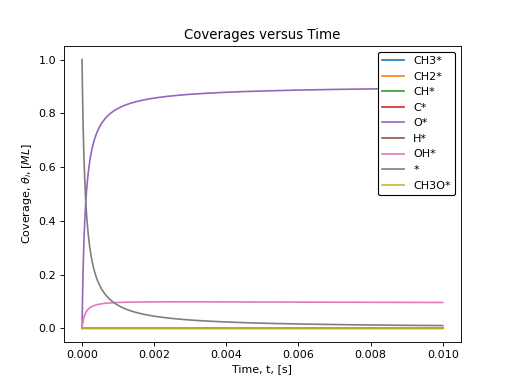

In [8]:
%%time
covg,covg_time= MKM1.solve_coverage(plot=True) 

In [9]:
MKM1.get_SS_coverages() #Printing the Steady state coverages (Note: Additional options can be set manually - See main.py for syntax)

array([3.143623673756177e-05, 9.868352241174641e-05,
       1.372685287138163e-07, 1.7705219233791967e-10, 0.8935841038688813,
       3.4905349198320975e-08, 0.0961332528332886, 0.010152351108458555,
       7.934644932520368e-11], dtype=object)

<IPython.core.display.Javascript object>


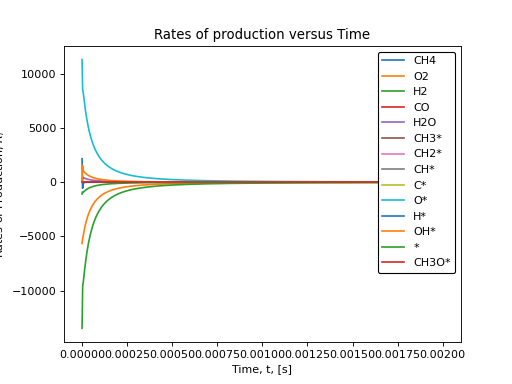

In [10]:
%%time
rates_p,rates_p_time= MKM1.solve_rate_production(tf=2e-3, plot=True) 

<IPython.core.display.Javascript object>


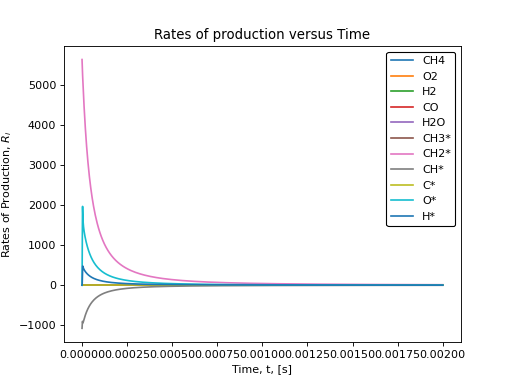

In [11]:
%%time
rates_r,rates_r_time= MKM1.solve_rate_reaction(tf=2e-3,plot=True) 

### Dynamic Pressure Modulation

<IPython.core.display.Javascript object>


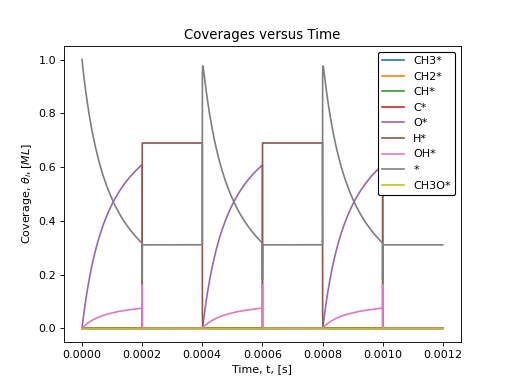

In [12]:
%%time
S1 = np.copy(MKM1.P[:])
S2 = np.copy(MKM1.P[:])
S1[0] = 0.1
S2[2] = 1e2
S1 = list(S1)
S2 = list(S2)
sol1,solt1 = MKM1.periodic_operation_two_states(State1=S1,State2=S2,t1=2e-4,t2=2e-4,n_cycles=3,label='coverages',plot=True) #Calculate the transient response from State 1 to State 2. 